# Step 1: Importing Required Libraries..

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Loading & Preprocessing

In [28]:
dataset = pd.read_csv('my_movies.csv')

In [29]:
dataset.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [31]:
dataset = dataset.drop(['V1','V2','V3','V4','V5'],axis=1)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


# Step 3: EDA

In [33]:
zero =[]
one = []
for i in dataset.columns:
    zero.append(list(dataset[i].value_counts())[0])
    one.append(list(dataset[i].value_counts())[1])

In [34]:
count_df = pd.DataFrame([zero,one], columns=dataset.copy().columns, index=['not_watched', 'watched'])

In [35]:
sorted_df = count_df.sort_values(by=['watched'],axis=1,ascending=False).transpose()

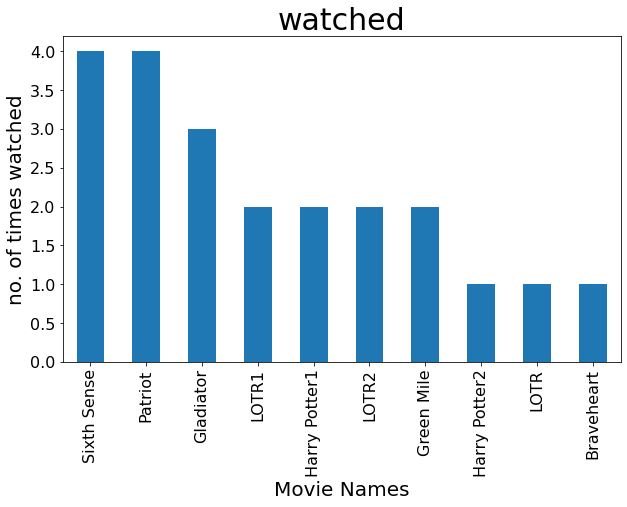

In [41]:
# Plotting sorted top watched products..

fig = plt.subplots(figsize=(10,6))
purchased = sorted_df.xs('watched' ,axis = 1)
purchased.plot(kind='bar',fontsize=16)
plt.title('watched',fontsize=30)
plt.xlabel('Movie Names', fontsize=20)
plt.ylabel('no. of times watched', fontsize=20)
plt.show()

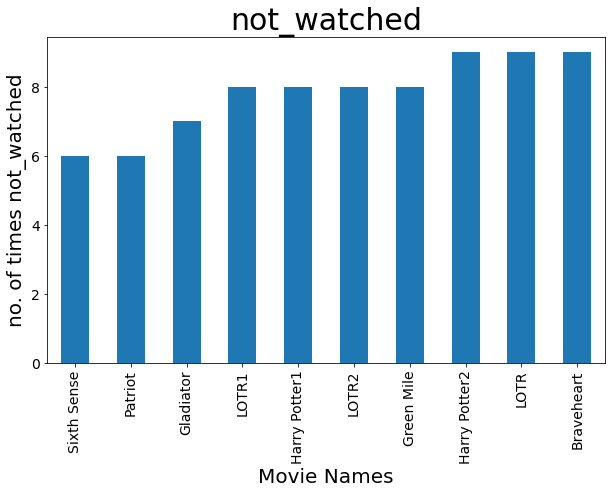

In [42]:
# Plotting sorted top not-watched products..

fig = plt.subplots(figsize=(10,6))
purchased = sorted_df.xs('not_watched' ,axis = 1)
purchased.plot(kind='bar',fontsize=14)
plt.title('not_watched',fontsize=30)
plt.xlabel('Movie Names', fontsize=20)
plt.ylabel('no. of times not_watched', fontsize=20)
plt.show()

# Step 4: Apriori Rule
***

ref. used: https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html

## 4.1 Measure 1: Support 
***

 #### Concept:

![](https://github.com/ShrikantUppin/Association_Rules/blob/main/measure1_formula.png?raw=true)

<img src="https://github.com/ShrikantUppin/Association_Rules/blob/main/measure1.png?raw=true" width="300" height="300">


 This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.


***

 ### Finding out support for each possible products or diff. product sets present in transction dataframe(dataset1)

In [46]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(dataset, min_support=0.02, use_colnames=True, max_len=3)

# min_support value can be choose by the user/business need
# max_len is item combinations..here i have taken as 5. total items in combination formed should not be more than 5

In [47]:
freq_items.shape

(46, 2)

In [52]:
freq_items.head(10)

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [51]:
# checking last 10 rows 

freq_items.tail(10)

,support,itemsets
36,0.1,"(Sixth Sense, Harry Potter1, LOTR2)"
37,0.1,"(Sixth Sense, Harry Potter1, Green Mile)"
38,0.1,"(Sixth Sense, LOTR2, Green Mile)"
39,0.1,"(Sixth Sense, LOTR, Green Mile)"
40,0.1,"(Gladiator, Patriot, Braveheart)"
41,0.1,"(Green Mile, Gladiator, LOTR)"
42,0.1,"(Harry Potter1, LOTR1, LOTR2)"
43,0.1,"(Green Mile, Harry Potter1, LOTR1)"
44,0.1,"(Green Mile, LOTR1, LOTR2)"
45,0.1,"(Green Mile, Harry Potter1, LOTR2)"


If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets.

***
***

## 4.2 Measure 2: Confidence
***
***

 #### Concept:

 This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.



<img src="https://github.com/ShrikantUppin/Association_Rules/blob/main/measure2.png?raw=true" >

***
* Drawbacks of Confidence measure:
***

* it might misrepresent the importance of an association. 

* This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. 


Note: To account for the base popularity of both constituent items, we use a third measure called lift.

 ### Building Association rules using confidence metrics.

In [53]:
# for this we need support value dataframe..that is fre_items from measure1.

confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)

# min_threshold is nothing but setting min % crieteria. In this case i have choosen 20% 
#...confidence should be minimum 20%.

In [54]:
# checking combination in first 10 rows from dataset

confidence_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
8,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
9,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf


In [55]:
# checking combination in last 10 rows from dataset

confidence_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
103,"(LOTR1, LOTR2)",(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
104,(Green Mile),"(LOTR1, LOTR2)",0.2,0.2,0.1,0.5,2.5,0.06,1.6
105,(LOTR1),"(Green Mile, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
106,(LOTR2),"(Green Mile, LOTR1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
107,"(Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
108,"(Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
109,"(Harry Potter1, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
110,(Green Mile),"(Harry Potter1, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
111,(Harry Potter1),"(Green Mile, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
112,(LOTR2),"(Green Mile, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


 ### Understanding terminologies:
 ***
 
 [Basic Terminology](https://michael.hahsler.net/research/recommender/associationrules.html#:~:text=Leverage%20measures%20the%20difference%20of,expected%20from%20the%20independent%20sells)

 #### 1 . Antecedent and Consequent
 
The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.


 #### 2. antecedent support
 
 It is antecedent support with all transction numbers.
 
 
 #### 3. consequent support

 It is consequent  support with all transction numbers.
 
 
 #### 4. Support:
 
 Here support is considered for antecedent+consequent combination.
 
 
 #### 5. confidence
 
 Confidence is related to 'consequent item' or 'consequent item combination' w.r.t. antecedent item  or item set.
 
 
 #### 6. lift
 
Lift measures how many times more often X and Y occur together than expected if they where statistically independent. Lift is not down-ward closed and does not suffer from the rare item problem.
 
 In short firm possibilities of buying consequent whenever Antecedent item is purchaed by customer
 
 
 #### 7. Leverage
 
 Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells.
 
 leverage also can suffer from the rare item problem.
 
 leverage(X -> Y) = P(X and Y) - (P(X)P(Y))
 
 
 #### 8. conviction
 
 conviction(X -> Y) = P(X)P(not Y)/P(X and not Y)=(1-sup(Y))/(1-conf(X -> Y))

Conviction compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y. In that respect it is similar to lift (see section about lift on this page), however, it contrast to lift it is a directed measure. Furthermore, conviction is monotone in confidence and lift.


#### 9. Coverage

coverage(X) = P(X) = sup(X)

A simple measure of how often a item set appears in the data set.

## 4.3 Measure 3: Lift 
***

 #### Concept:
    
This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.


<img src="https://github.com/ShrikantUppin/Association_Rules/blob/main/measure3.png?raw=true" >

 ### Building Association rules using confidence metrics.

In [56]:
lift_association = association_rules(freq_items, metric="lift", min_threshold=1)

In [57]:
lift_association.shape

(124, 9)

In [62]:
lift_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
5,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
6,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20
7,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
8,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
9,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


In [63]:
lift_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
114,"(LOTR1, LOTR2)",(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
115,(Green Mile),"(LOTR1, LOTR2)",0.2,0.2,0.1,0.5,2.5,0.06,1.6
116,(LOTR1),"(Green Mile, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
117,(LOTR2),"(Green Mile, LOTR1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
118,"(Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
119,"(Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
120,"(Harry Potter1, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
121,(Green Mile),"(Harry Potter1, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
122,(Harry Potter1),"(Green Mile, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
123,(LOTR2),"(Green Mile, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


## 4.4 Eliminating redudancy sets...

In [64]:
# As per above output observation, it is clear that when same items repeated..
#...(for ex: in first row: A-->B, and in next row B-->A) gives same leverage & lift but confidence is different.
#...this is known as redudency when same item set shuffled as ancedents & consequent.
#.... so to eliminates in easist way..will sort n the basis of leverage & confidence.

redundancy = lift_association.sort_values(by=['leverage','confidence'],axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.shape
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [65]:
redundancy.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
119,(Gladiator),"(Sixth Sense, LOTR)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
120,(Gladiator),"(Patriot, Braveheart)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
121,(Gladiator),"(Green Mile, LOTR)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
122,(Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.00
123,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.00


In [66]:
# Now check output of above cells, when leverage and lift are same for consequent rows..then compare with the value of confidence
#...if confidence of middle cell found less than two side cells..drop it.
# dropping odd index rows..since it contains less confidence
# ultimately this will help us to elminate repeated combination..which has low lift & confidence..

unique_rules = redundancy.iloc[::2]
unique_rules.shape

(62, 9)

In [67]:
unique_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
6,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
10,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
12,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
14,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
16,"(Sixth Sense, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
18,"(Sixth Sense, LOTR1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


 ### Summary:
 
 
 * freq_items = apriori(dataset1, min_support=0.02, use_colnames=True, max_len=5)
 
 

 * confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)
 
 
 * lift_association = association_rules(freq_items, metric="lift", min_threshold=1)
 

# Step 5: Generated Rules analysis/Processing

We have obtained unique_rules with metric='lift'. Now, this unique_rules dataframe will be used for analysis..just filtering as per threshold value set/required & obtaining diff. pairs of item sets.


Note: lift is set to 1. in previous code. Since if lift is equal to or greater than 1..that means chances to pick consequents items by customer is more..!!

In [68]:
top_20 = unique_rules[unique_rules['lift']>1.5]

 ### Top 20 combinations w.r.t. Lift more than 1.5

In [69]:
top_20_sort = top_20.sort_values(by='lift', ascending=False)
top_20_sort.reset_index(inplace=True)

In [70]:
top_20_sort = top_20_sort.drop(['index'],axis=1)

In [73]:
top_20_sort.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
1,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
2,"(Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
3,(Harry Potter1),"(Green Mile, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
4,(LOTR1),"(Green Mile, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
5,(Green Mile),"(Harry Potter1, LOTR1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
6,(LOTR1),"(Harry Potter1, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
7,(Green Mile),"(Sixth Sense, LOTR)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
8,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
9,(LOTR2),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


 ### Unique item names from to 20 lift combinations..

In [74]:
x = top_20_sort[['antecedents','consequents']]

In [75]:
item_list = []
for i in x.antecedents.to_list():
    for j in list(set(i)):
        item_list .append(j)

In [76]:
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [77]:
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    top_items =[]
    for m in unique_list:
        top_items.append(m)
    print(top_items)

In [78]:
unique(item_list)

['Green Mile', 'Patriot', 'LOTR', 'Sixth Sense', 'Gladiator', 'LOTR2', 'Harry Potter1', 'LOTR1', 'Braveheart', 'Harry Potter2']


above are the top 20 items & the shuffled combination gives top lift result.

***
***